## Regresion Lineal Multiple

### Carga de librerias y datos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r'C:\Users\carolina\Desktop\FormDataAnalyst\Modelos\regresion-lineal_multiple.csv')

### Exploracion previa

In [5]:
df.sample(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
46,1315.46,115816.21,297114.46,Florida,49490.75
30,61994.48,115641.28,91131.24,Florida,99937.59
18,91749.16,114175.79,294919.57,Florida,124266.90
28,66051.52,182645.56,118148.20,Florida,103282.38
5,131876.90,99814.71,362861.36,New York,156991.12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


El DF consta de variables cuantitativas continuas referidas a gastos y una variable categorica (estados). 
La variable ganancia sera nuestra variable objetivo.

In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<AxesSubplot:ylabel='Density'>

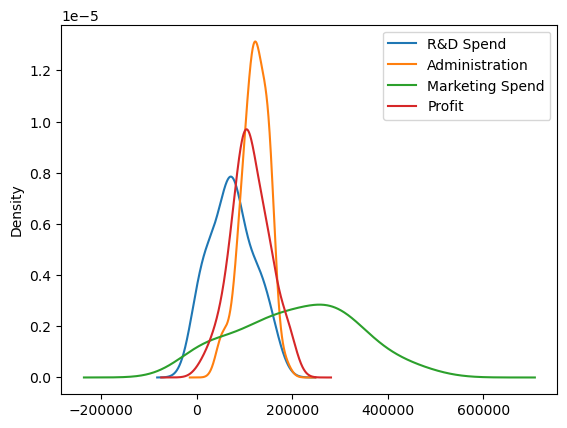

In [8]:
df.plot.kde()  # Los gastos de marketing son mucho mas dispersos en su distribucion

Hay valores 0 pocos, 2 y 3 en R&D y MKT

In [9]:
#df.sort_values(by='Profit', ascending =True)

<AxesSubplot:>

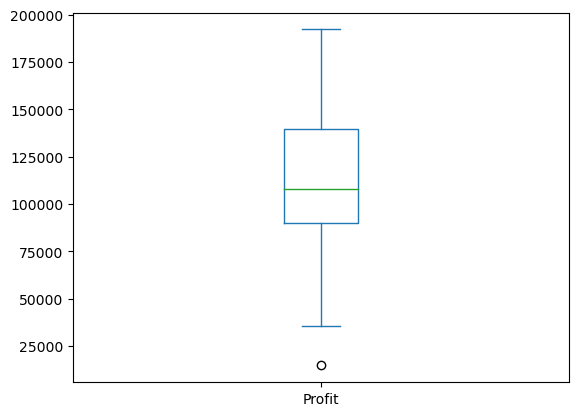

In [10]:
df['Profit'].plot.box()

Analizando la distribucion de las variables observamos que los gastos mantienen una distribucion bastante normal, con simetria, medianas bastante centradas y sin presencia de outliers.
La excepcion es profit que presenta asimentria positiva o a derecha y presenta un outlier.

In [11]:
# El outlier es el reg de indice 49

In [12]:
indicesmenosoutlier=list(df.index)
indicesmenosoutlier.pop(49)

49

In [13]:
len(indicesmenosoutlier)

49

<AxesSubplot:>

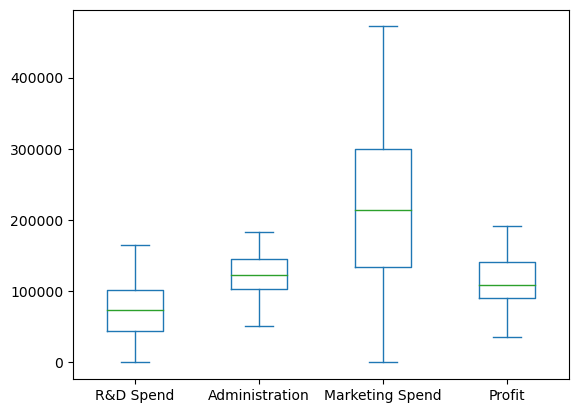

In [14]:
df.loc[indicesmenosoutlier,:].plot.box()

In [15]:
len(indicesmenosoutlier) # 50-1 ok

49

Quitar el outlier en profit aun hace mas asimetrica su distribucion.

No quitare el outlier puesto que ademas es la variable objetivo.

In [16]:
df.isna().value_counts() # no hay nulos. Si algunos costes cero. 

R&D Spend  Administration  Marketing Spend  State  Profit
False      False           False            False  False     50
dtype: int64

Como se comportan las variables entre si

In [17]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Profit tiene alta correlacion con R&D, media con MKT, y muy baja con Admin.

<AxesSubplot:title={'center':'Correlacion Profit con R&D'}, xlabel='R&D Spend', ylabel='Profit'>

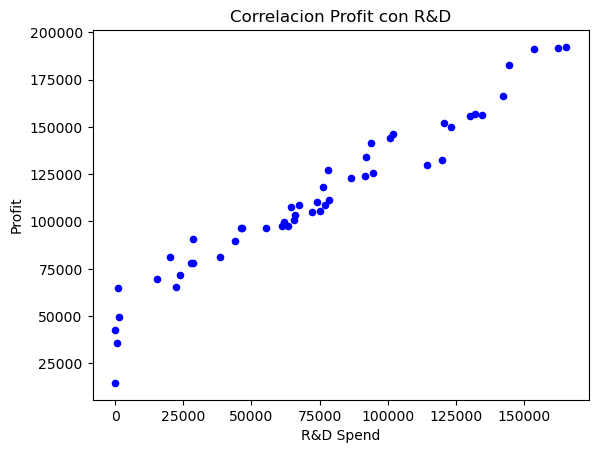

In [18]:
df.plot.scatter(x='R&D Spend', y = 'Profit', c='blue', title='Correlacion Profit con R&D') 
# podemos ver esa correlacion en la linealidad de la grafica de puntos.

Vemos como afectan los estados en esta relacion

In [19]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

<AxesSubplot:title={'center':'Correlacion Profit con R&D'}, xlabel='R&D Spend', ylabel='Profit'>

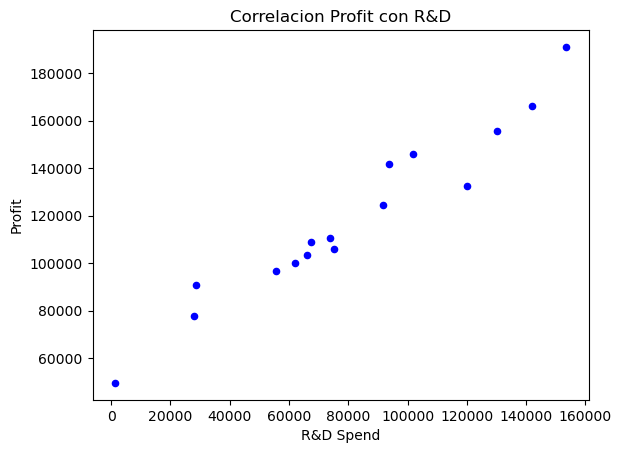

In [20]:
df[df['State']=='Florida'].plot.scatter(x='R&D Spend', y = 'Profit', c='blue', title='Correlacion Profit con R&D')

Se mantiene la linealidad, es decir la correlacion, analizando la grafica para las distintas categorias (en cada estado) 

### Separacion de variable objetivo y variables independientes

In [21]:
df.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [22]:
x=df.iloc[:,:-1].values

In [23]:
y=df.iloc[:,4].values

In [24]:
x[0]

array([165349.2, 136897.8, 471784.1, 'New York'], dtype=object)

In [25]:
y[0]

192261.83

### Preparacion/Transformación de los datos

En este punto transformaremos la variable estado a dummy

In [26]:
df.columns.values

array(['R&D Spend', 'Administration', 'Marketing Spend', 'State',
       'Profit'], dtype=object)

In [27]:
df.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [29]:
categorico = ColumnTransformer( [('one_hot_encoder',OneHotEncoder(categories = 'auto'),[3])] , remainder='passthrough' ) # Profit=columna 3

In [30]:
x = np.array(categorico.fit_transform(x), dtype = np.double)  # drop=‘first’ con este argumento se quitaria una de las dummyes (creo que va arriba)

In [31]:
x[1] #  California         Florida      NY     	R&D Spend     Administration  Marketing Spend

array([1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
       1.5137759e+05, 4.4389853e+05])

In [32]:
df.loc[:,'State'].value_counts() ## Hay menos en Florida. Quito esta dummy

New York      17
California    17
Florida       16
Name: State, dtype: int64

Quitamos siempre una dummy porque dejarlas todas seria redundante. Una de ellas sobra.

In [71]:
x=x[:,[0,2,3,4,5]] 
x[0] #  California        NY        R&D Spend     Administration  Marketing Spend

array([0.000000e+00, 1.000000e+00, 1.653492e+05, 1.368978e+05,
       4.717841e+05])

### Division training y test

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1987) # todo en este orden

In [77]:
x_train.size/5, x_test.size/5 # 5 son las columnas

(40.0, 10.0)

In [78]:
 y_train.size, y_test.size

(40, 10)

### Preparacion del modelo

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
regresion=LinearRegression()

In [81]:
regresion.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=regresion.predict(x_test)

### Iteracion del modelo (manual)

In [99]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

###### Algoritmo OLS Mínimos cuadrados ordinarios (OLS)

* Para construir este modelo necesitamos agregar una columna de 'unos' al comienzo del array de las variables predictoras (x).

* Esto se hace para poder contrastar el p-valor en el modelo haciendo que el nivel de significacion sea mayor.

* Utilizamos para ello la funcion 
            
        np.append(arr, values, axis=None)
        
        arr: es un array de Numpy.
        values: son los valores (arrays) que se agregan al final del array indicado en arr.   
        axis: (opcional)

In [124]:
x = np.append(arr=np.ones((df.shape[0],1)).astype(int), values=x, axis=1 )
                  # matriz de 50 x 1 (filas totales/una columna) que se agregan al comienzo de x
x[0]
    #       ones       California        NY        R&D Spend     Administration  Marketing Spend

array([1.000000e+00, 0.000000e+00, 1.000000e+00, 1.653492e+05,
       1.368978e+05, 4.717841e+05])

In [125]:
significacion=0.05 # umbral del p-valor

In [126]:
x_optimo=x[:,[0,1,2,3,4,5]]  

# En primer lugar ponemos todas las variables. 
# Luego vamos quitando la de mayor p-valor, hasta p-valor <= significacion (0,05)

In [127]:
regresion_ols=sm.OLS(endog=y, exog=x_optimo).fit()
regresion_ols.summary()   # P es el p-valor

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           1.34e-27
Time:                        15:48:35   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.032e+04   7251.767      6.940      0.000    3.57e+04    6.49e+04
x1          -198.7888   3371.007     -0.059      0.953   -6992.607    6595.030
x2          -240.6758   3338.857     -0.072      0.943   -6969.701    6488.349
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.56e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Interpretacion del informe OLS Mínimos cuadrados ordinarios

Las variables que muestra son:

    const: es la la columna de unos. A partir de aqui fija el umbral de P-valor.
    
    x1, x2,... esas son las variables predictoras.

Quito la de mayor p-valor absoluto (P en el informe):

    1. (x1 con p-valor=0,953) California
    2. (x1 con p-valor=0,961) NY
    3. (x2 con p-valor=0,66) Administracion
    4. (x2 con p-valor=0,06) Marketing Spend  Aun sigue siendo > 0,05 
    
* Para un nivel de confianza del 95 por ciento, un valor p (probabilidad) menor que 0,05 indica una heterocedasticidad o no estacionariedad estadísticamente significativa. 
    
* R cuadrado: indica que el modelo (sus variables explicativas modeladas con una regresión lineal) explica aproximadamente ese porcentaje a la variable dependiente. 
  

In [131]:
x_optimo=x[:,[0,2,3,4,5]] # quite x1 que es la 1 Cuidado aqui son las columnas de x no de x_optimo!!
x_optimo[0] 
#       ones            NY        R&D Spend     Administration  Marketing Spend

array([1.000000e+00, 1.000000e+00, 1.653492e+05, 1.368978e+05,
       4.717841e+05])

In [130]:
regresion_ols=sm.OLS(endog=y, exog=x_optimo).fit()
regresion_ols.summary()   # P es el p-valor

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           8.50e-29
Time:                        16:02:26   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.018e+04   6747.623      7.437      0.000    3.66e+04    6.38e+04
x1          -136.5042   2801.719     -0.049      0.961   -5779.456    5506.447
x2             0.8059      0.046     17.571      0.000       0.714       0.898
x3            -0.0269      0.052     -0.521      0.605      -0.131       0.077
x4             0.0271      0.017      1.625      0.111      -0.007       0.061
==============================================================================
Omnibus:                       14.892   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.665
Skew:                          -0.949   Prob(JB):                     1.97e-05
Kurtosis:                       5.608   Cond. No.                     1.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [132]:
x_optimo=x[:,[0,3,4,5]] # quite x1 que era la 2 # cuidado aqui que estoy seleccionando de x y no de x_optimo!!
x_optimo[0] 
#       ones           R&D Spend   Administration  Marketing Spend

array([1.000000e+00, 1.653492e+05, 1.368978e+05, 4.717841e+05])

In [133]:
regresion_ols=sm.OLS(endog=y, exog=x_optimo).fit()
regresion_ols.summary()   # P es el p-valor

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           4.53e-30
Time:                        16:08:06   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
x_optimo=x[:,[0,3,5]] ## quito x2 que era la 4 ¡cuidado aqui que estoy seleccionando de x y no de x_optimo!!
x_optimo[0] 
#       ones           R&D Spend    Marketing Spend

array([1.000000e+00, 1.653492e+05, 4.717841e+05])

In [136]:
regresion_ols=sm.OLS(endog=y, exog=x_optimo).fit()
regresion_ols.summary()   # P es el p-valor

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           2.16e-31
Time:                        16:16:59   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
x_optimo=x[:,[0,3]] ## quito x2 que era la 5 ¡cuidado aqui que estoy seleccionando de x y no de x_optimo!!
x_optimo[0] 
#       ones           R&D Spend   

array([1.000000e+00, 1.653492e+05])

In [138]:
regresion_ols=sm.OLS(endog=y, exog=x_optimo).fit()
regresion_ols.summary()   # P es el p-valor

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           3.50e-32
Time:                        16:19:25   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

En este punto no hay p-valores > significancia (0,05)

Solo nos quedamos con R&D Spend que es la variable que se veia ya desde el comienzo que esta fuertemente correlacionada con Profit.

### Iteracion del modelo (automatica) Propagacion hacia atrás 

Esta funcion calcula y devuelve de la lista de variables que recibe (todas las predictoras), aquellas variables cuyo p-valor en la evaluacion del modelo dan por debajo del limite fijado para la significancia, que tambien se pasa como parametro.


In [139]:
def backwardElimination(x, SL):    
    numVars = len(x[0])    
    temp = np.zeros(x.shape).astype(int)    
    for i in range(0, numVars):        
        regressor_OLS = sm.OLS(y, x.tolist()).fit()        
        maxVar = max(regressor_OLS.pvalues).astype(float)        
        adjR_before = regressor_OLS.rsquared_adj.astype(float)        
        if maxVar > SL:            
            for j in range(0, numVars - i):                
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):                    
                    temp[:,j] = x[:, j]                    
                    x = np.delete(x, j, 1)                    
                    tmp_regressor = sm.OLS(y, x.tolist()).fit()                    
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)                    
                    if (adjR_before >= adjR_after):                        
                        x_rollback = np.hstack((x, temp[:,[0,j]]))                        
                        x_rollback = np.delete(x_rollback, j, 1)     
                        print (regressor_OLS.summary())                        
                        return x_rollback                    
                    else:                        
                        continue    
    regressor_OLS.summary()    
    return x


In [140]:
significacion=0.05
x_optimo_aut = x[:, [0,1,2,3,4,5]]
x_modelo=backwardElimination(x_optimo_aut, significacion)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           2.16e-31
Time:                        17:07:57   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.0

In [142]:
x_modelo[0]  # estas son las variables que salen por la funcion como candidatas a predecir y (Profit)
    #    ones        R&D Spend     Marketing Spend 

array([1.000000e+00, 1.653492e+05, 4.717840e+05])

In [143]:
x[0] #   ones         California        NY        R&D Spend     Administration  Marketing Spend

array([1.000000e+00, 0.000000e+00, 1.000000e+00, 1.653492e+05,
       1.368978e+05, 4.717841e+05])

El mejor modelo segun eliminacion automatica hacia atras es:  

    Profit ~ R&D Spend     Marketing Spend  
    

In [ ]:
 # 'one', State.Florida','State.New York' ,'R&D Spend', 'Administration', 'Marketing Spend'regresion_ols = sm.OLS(endog = y, exog = x_optimo).fit()
# regresion_ols.summary() # busco la variable con el abs( max( p|t| ) )  => x2 la variable a quitar ('State.New York')

### Evaluacion del modelo

In [144]:
from sklearn.metrics import r2_score

##### RECALCULAMOS LA PREDICCION CON UNA SOLA VARIABLE SEGUN SELECCION MANUAL 
(porque la teniamos con 5 variables originalmente y la seleccion manual a quedado con una) 

In [176]:
# Ubicamos la variable R&D en los lotes
x_train[0]  
 #       California        NY        R&D Spend     Administration  Marketing Spend

array([0.000000e+00, 1.000000e+00, 1.550573e+04, 1.273823e+05,
       3.553417e+04])

In [175]:
x_train.shape, y_train.shape,  x_test.shape, y_test.shape 
# las 40 filas para train
# las 10 filas de test 

((40, 5), (40,), (10, 5), (10,))

In [167]:
regresion=LinearRegression() #  # La variable es la R&D que es la 2 (resultado de la seleccion manual)
regresion.fit(x_train[:,[2]],y_train) ## esto siempre calculado con el lote de entrenamiento 

LinearRegression()

In [194]:
y_pred_test=regresion.predict(x_test[:,[2]])


* Evaluamos el modelo con la variable predictora R&D x_train, y_train

In [196]:
r2_score(y_train, regresion.predict(x_train[:,[2]])) # [2] es la variable R&D Spend que es la que nos interesa


0.9438511512066531

* Evaluamos el modelo con la variable predictora R&D x_test, y_test

In [197]:
r2_score(y_test, regresion.predict(x_test[:,[2]]))

0.9528305696753229

<function matplotlib.pyplot.show(close=None, block=None)>

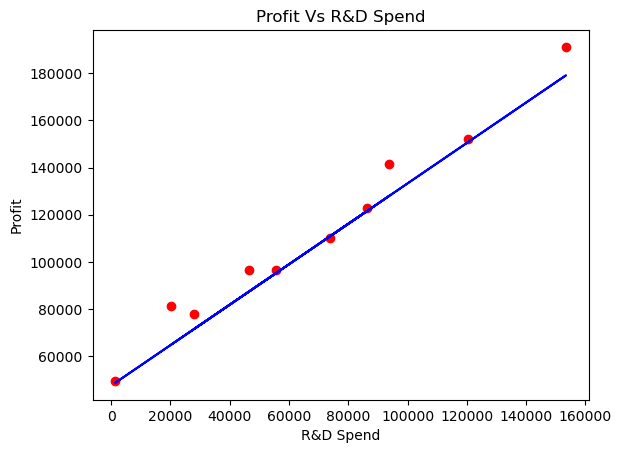

In [173]:
plt.title('Profit Vs R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.scatter(x_test[:,[2]], y_test, color='red')
plt.plot(x_test[:,[2]], regresion.predict(x_test[:,[2]]), color='blue')
plt.show

##### RECALCULAMOS LA PREDICCION CON DOS VARIABLES SEGUN SELECCION AUTOMATICA 



* Evaluamos el modelo con las variables del proceso automatico R&D y MKT

In [177]:
regresion_auto=LinearRegression() #  # Las variables son la R&D que es la 2 y la de MKT que es la 4
regresion_auto.fit(x_train[:,[2,4]],y_train) ## esto siempre calculado con el lote de entrenamiento 

LinearRegression()

In [198]:
y_pred_test_auto=regresion_auto.predict(x_test[:,[2,4]])

* Evaluamos el modelo auto con las variables predictoras R&D y MKT x_train, y_train

In [180]:
r2_score(y_train, regresion_auto.predict(x_train[:,[2,4]]))

0.9485932141955935

* Evaluamos el modelo auto con las variables predictoras R&D y MKT x_test, y_test

In [183]:
r2_score(y_test, regresion_auto.predict(x_test[:,[2,4]]))

0.9535560545163849

In [ ]:
## Mejora muy poco el modelo automatico respecto del manual, por lo que no vale la pena introducir una variable mas por esa diferencia
# manual 0.9528
# auto 0.9535

##### RECALCULAMOS LA PREDICCION CON TODAS LAS VARIABLES


In [189]:
regresion_todas=LinearRegression() #  con todas las variables predictoras
regresion_todas.fit(x_train,y_train)

LinearRegression()

In [190]:
y_pred_train_todas=regresion_todas.predict(x_train)

In [193]:
r2_score(y_test, regresion_todas.predict(x_test))

0.9526282336895371

* COMPARAMOS EL R2 EN CADA MODELO

In [199]:
r2_score(y_test, regresion.predict(x_test[:,[2]])) # manual

0.9528305696753229

In [201]:
r2_score(y_test, regresion_auto.predict(x_test[:,[2,4]])) # automatico

0.9535560545163849

In [202]:
r2_score(y_test, regresion_todas.predict(x_test)) # todas las variables

0.9526282336895371

* EVALUACION DE LOS MODELOS CON MAE (error absoluto medio) Y MSE (error cuadratico medio)


Estadisticos

* MAE es la distancia promedio entre los valores estimados y el valor real (no castiga grandes errores en la predicción).
* MSE mide la diferencia cuadrática promedio entre los valores estimados y el valor real.


In [203]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  

In [211]:
## Con variable predictora obtenida manualmente
r2_manual=r2_score(y_test, regresion.predict(x_test[:,[2]])) 
mae_manual=mean_absolute_error(y_test, regresion.predict(x_test[:,[2]]))
mse_manual=mean_squared_error(y_test, regresion.predict(x_test[:,[2]]))
print(f'Estadisticos para modelo manual de una sola variable (R&D)\n r2: {r2_manual:.2f} \n mae: {mae_manual:.2f} \n mse: {mse_manual:.2f}')

Estadisticos para modelo manual de una sola variable (R&D)
 r2: 0.95 
 mae: 6278.51 
 mse: 72402557.87


In [212]:
r2_auto=r2_score(y_test, regresion_auto.predict(x_test[:,[2,4]]))
mae_auto=mean_absolute_error(y_test, regresion_auto.predict(x_test[:,[2,4]]))
mse_auto=mean_squared_error(y_test, regresion_auto.predict(x_test[:,[2,4]]))
print(f'Estadisticos para modelo automatico de dos variables (R&D+MKT) \n r2: {r2_auto:.2f} \n mae: {mae_auto:.2f} \n mse: {mse_auto:.2f}')

Estadisticos para modelo automatico de dos variables (R&D+MKT) 
 r2: 0.95 
 mae: 7218.28 
 mse: 71288977.36


In [213]:
r2_todas=r2_score(y_test, regresion_todas.predict(x_test))
mae_todas=mean_absolute_error(y_test, regresion_todas.predict(x_test))
mse_todas=mean_squared_error(y_test, regresion_todas.predict(x_test))
print(f'Estadisticos para modelo con todas las variables \n r2: {r2_todas:.2f} \n mae: {mae_todas:.2f} \n mse: {mse_todas:.2f}')

Estadisticos para modelo con todas las variables 
 r2: 0.95 
 mae: 7311.85 
 mse: 72713132.81


In [216]:
x_test.shape, regresion_todas.predict(x_test).shape

((10, 5), (10,))

<function matplotlib.pyplot.show(close=None, block=None)>

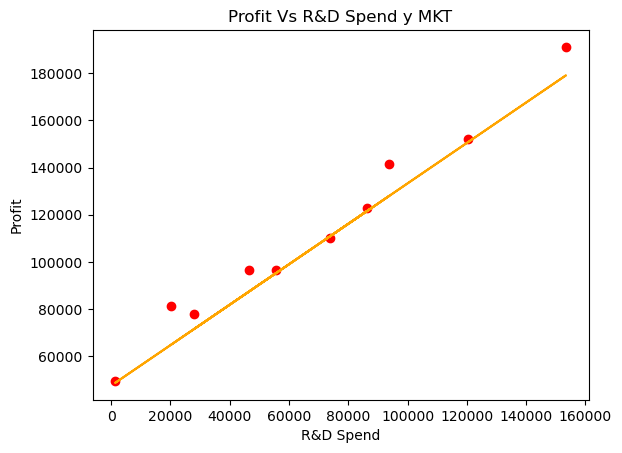

In [222]:
plt.title('Profit Vs R&D Spend y MKT')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.scatter(x_test[:,[2]], y_test, color='red')
#plt.plot(x_test, regresion_todas.predict(x_test), color='green') no se puede graficar con mas de una var
#plt.plot(x_test[:,[2,4]], regresion_auto.predict(x_test[:,[2,4]]), color='blue')
plt.plot(x_test[:,[2]], regresion.predict(x_test[:,[2]]), color='orange')
plt.show

In [ ]:
EL GRAFICO SUMADO NO DA BIEN

In [185]:
x_test[:,[2,4]].sum()

3024609.31

In [187]:
x_test[:,[2,4]]

array([[ 20229.59, 185265.1 ],
       [ 86419.7 ,      0.  ],
       [ 46426.07, 210797.67],
       [ 27892.92, 164470.71],
       [ 93863.75, 249839.44],
       [ 73994.56, 303319.26],
       [153441.51, 407934.54],
       [120542.52, 311613.29],
       [  1315.46, 297114.46],
       [ 55493.95, 214634.81]])

In [186]:
x_test[:,[2]]+x_test[:,[4]]

array([[205494.69],
       [ 86419.7 ],
       [257223.74],
       [192363.63],
       [343703.19],
       [377313.82],
       [561376.05],
       [432155.81],
       [298429.92],
       [270128.76]])

<function matplotlib.pyplot.show(close=None, block=None)>

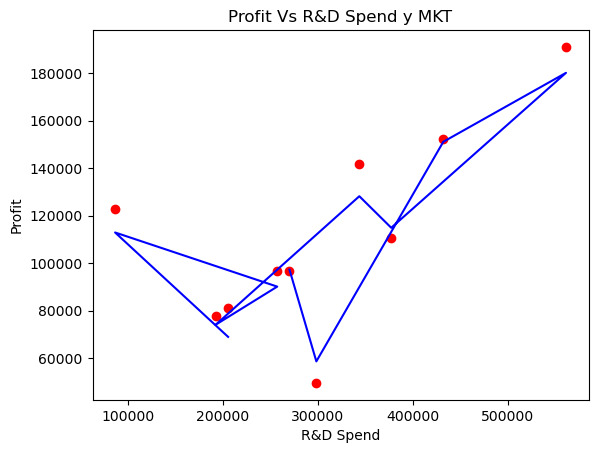

In [188]:
plt.title('Profit Vs R&D Spend y MKT')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.scatter(x_test[:,[2]]+x_test[:,[4]], y_test, color='red')
plt.plot(x_test[:,[2]]+x_test[:,[4]], regresion_auto.predict(x_test[:,[2,4]]), color='blue')
plt.show